Trained the deep learning model to predict the customers who purchased caravan Insurance.

In [ ]:
# loaded all required packages
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
%tensorflow_version 2.x
from numpy.random import seed
seed(2)
import tensorflow as tf
from tensorflow import keras
from IPython import display
from matplotlib import cm
from matplotlib import gridspec
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.python.data import Dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
#print(tf._version_)

# Preprocessing

In [ ]:

col_names = ['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA', 'MRELOV', 'MFALLEEN',
       'MFGEKIND', 'MFWEKIND', 'MOPLHOOG', 'MOPLMIDD', 'MOPLLAAG', 'MBERHOOG',
       'MBERZELF', 'MBERBOER', 'MBERMIDD', 'MBERARBG', 'MBERARBO', 'MSKA',
       'MSKB1', 'MSKB2', 'MSKC', 'MSKD', 'MHHUUR', 'MHKOOP', 'MAUT1', 'MAUT2',
       'MAUT0', 'MZFONDS', 'MZPART', 'MINKM30', 'MINK3045', 'MINK4575',
       'MINK7512', 'MINK123M', 'MINKGEM', 'MKOOPKLA', 'PWAPART', 'PWABEDR',
       'PWALAND', 'PPERSAUT', 'PBESAUT', 'PMOTSCO', 'PVRAAUT', 'PAANHANG',
       'PTRACTOR', 'PWERKT', 'PBROM', 'PLEVEN', 'PPERSONG', 'PGEZONG',
       'PWAOREG', 'PBRAND', 'PZEILPL', 'PPLEZIER', 'PFIETS', 'PINBOED',
       'PBYSTAND', 'AWAPART', 'AWABEDR', 'AWALAND', 'APERSAUT', 'ABESAUT',
       'AMOTSCO', 'AVRAAUT', 'AAANHANG', 'ATRACTOR', 'AWERKT', 'ABROM',
       'ALEVEN', 'APERSONG', 'AGEZONG', 'AWAOREG', 'ABRAND', 'AZEILPL',
       'APLEZIER', 'AFIETS', 'AINBOED', 'ABYSTAND', 'CARAVAN']

train_df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-mld/ticdata2000.txt', sep = '\t', header=None, names = col_names)
tic_val = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-mld/ticeval2000.txt', sep = '\t', header=None, names = col_names[:85])
tic_trgt = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/tic-mld/tictgts2000.txt', sep = '\t', header=None)
tic_validation=tic_val.join(tic_trgt)


In [ ]:
tic_validation.rename({0:'CARAVAN'}, axis=1, inplace=True)

In [ ]:
tic_df=pd.concat([train_df,tic_validation],ignore_index=True)

In [ ]:
tic_df.tail()

,MOSTYPE,MAANTHUI,MGEMOMV,MGEMLEEF,MOSHOOFD,MGODRK,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,...,PPERSAUT,PBESAUT,PMOTSCO,PVRAAUT,PAANHANG,PTRACTOR,PWERKT,PBROM,PLEVEN,PPERSONG,PGEZONG,PWAOREG,PBRAND,PZEILPL,PPLEZIER,PFIETS,PINBOED,PBYSTAND,AWAPART,AWABEDR,AWALAND,APERSAUT,ABESAUT,AMOTSCO,AVRAAUT,AAANHANG,ATRACTOR,AWERKT,ABROM,ALEVEN,APERSONG,AGEZONG,AWAOREG,ABRAND,AZEILPL,APLEZIER,AFIETS,AINBOED,ABYSTAND,CARAVAN
9817,33,1,2,4,8,0,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,...,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
9818,24,1,2,3,5,1,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,...,6,0,0,0,0,0,0,0,6,0,0,0,4,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
9819,36,1,2,3,8,1,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,...,6,0,0,0,0,0,0,0,0,0,0,0,3,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
9820,33,1,3,3,8,1,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,...,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9821,8,1,2,3,2,4,3,0,3,5,2,2,0,6,3,8,0,1,8,0,0,0,0,1,4,0,5,1,0,2,7,9,0,0,2,7,0,0,7,2,...,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [ ]:
tic_df['CARAVAN'].value_counts()

0    9236
1     586
Name: CARAVAN, dtype: int64

In [ ]:
tic_df.isnull().sum()

MOSTYPE     0
MAANTHUI    0
MGEMOMV     0
MGEMLEEF    0
MOSHOOFD    0
           ..
APLEZIER    0
AFIETS      0
AINBOED     0
ABYSTAND    0
CARAVAN     0
Length: 86, dtype: int64

In [ ]:
tic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9822 entries, 0 to 9821
Data columns (total 86 columns):
 #   Column    Non-Null Count  Dtype
---  ------    --------------  -----
 0   MOSTYPE   9822 non-null   int64
 1   MAANTHUI  9822 non-null   int64
 2   MGEMOMV   9822 non-null   int64
 3   MGEMLEEF  9822 non-null   int64
 4   MOSHOOFD  9822 non-null   int64
 5   MGODRK    9822 non-null   int64
 6   MGODPR    9822 non-null   int64
 7   MGODOV    9822 non-null   int64
 8   MGODGE    9822 non-null   int64
 9   MRELGE    9822 non-null   int64
 10  MRELSA    9822 non-null   int64
 11  MRELOV    9822 non-null   int64
 12  MFALLEEN  9822 non-null   int64
 13  MFGEKIND  9822 non-null   int64
 14  MFWEKIND  9822 non-null   int64
 15  MOPLHOOG  9822 non-null   int64
 16  MOPLMIDD  9822 non-null   int64
 17  MOPLLAAG  9822 non-null   int64
 18  MBERHOOG  9822 non-null   int64
 19  MBERZELF  9822 non-null   int64
 20  MBERBOER  9822 non-null   int64
 21  MBERMIDD  9822 non-null   int64
 22  

**USING ONE HOT ENCODING FOR CATEGORICAL VARIABLES**


In [ ]:
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')
enc_df = pd.DataFrame(enc.fit_transform(tic_df[['MOSTYPE']]).toarray())
enc1_df = pd.DataFrame(enc.fit_transform(tic_df[['MGEMLEEF']]).toarray())
enc2_df = pd.DataFrame(enc.fit_transform(tic_df[['MOSHOOFD']]).toarray())
enc3_df = pd.DataFrame(enc.fit_transform(tic_df[['MGODRK']]).toarray())
enc4_df = pd.DataFrame(enc.fit_transform(tic_df[['PWAPART']]).toarray())

# merge with main df bridge_df on key values
#tic_df = tic_df.join(enc_df)

In [ ]:
for i in enc_df.columns:
   if i>=13:
     enc_df.rename({i:'MOSTYPE_'+str(i+2)}, axis=1, inplace=True)
   else:
     enc_df.rename({i:'MOSTYPE_'+str(i+1)}, axis=1, inplace=True)
for i in enc1_df.columns:
     enc1_df.rename({i:'MGEMLEEF_'+str(i+1)}, axis=1, inplace=True)
for i in enc3_df.columns:
     enc3_df.rename({i:'MGODRK_'+str(i)}, axis=1, inplace=True)
for i in enc4_df.columns:
     enc4_df.rename({i:'PWAPART_'+str(i)}, axis=1, inplace=True)
for i in enc2_df.columns:
     enc2_df.rename({i:'MOSHOOFD_'+str(i+1)}, axis=1, inplace=True)


In [ ]:
tic_df = tic_df.join(enc_df)
tic_df = tic_df.join(enc1_df)
tic_df = tic_df.join(enc2_df)
tic_df = tic_df.join(enc3_df)
tic_df = tic_df.join(enc4_df)

In [ ]:
tic_df.columns

Index(['MOSTYPE', 'MAANTHUI', 'MGEMOMV', 'MGEMLEEF', 'MOSHOOFD', 'MGODRK',
       'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE',
       ...
       'MGODRK_4', 'MGODRK_5', 'MGODRK_6', 'MGODRK_7', 'MGODRK_8', 'MGODRK_9',
       'PWAPART_0', 'PWAPART_1', 'PWAPART_2', 'PWAPART_3'],
      dtype='object', length=156)

In [ ]:
tic_df.drop(['MOSTYPE','MGEMLEEF','MOSHOOFD','MGODRK','PWAPART'],axis=1,inplace=True)

In [ ]:
tic_df.columns

Index(['MAANTHUI', 'MGEMOMV', 'MGODPR', 'MGODOV', 'MGODGE', 'MRELGE', 'MRELSA',
       'MRELOV', 'MFALLEEN', 'MFGEKIND',
       ...
       'MGODRK_4', 'MGODRK_5', 'MGODRK_6', 'MGODRK_7', 'MGODRK_8', 'MGODRK_9',
       'PWAPART_0', 'PWAPART_1', 'PWAPART_2', 'PWAPART_3'],
      dtype='object', length=151)

In [ ]:
tic_df.shape

(9822, 151)

In [ ]:
enc_df6 = pd.DataFrame(enc.fit_transform(tic_df[['CARAVAN']]).toarray())
enc_df6.rename({0:'CARAVAN_0',1:'CARAVAN_1'}, axis=1, inplace=True)
tic_df = tic_df.join(enc_df6)
tic_df

,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWABEDR,...,MOSTYPE_34,MOSTYPE_35,MOSTYPE_36,MOSTYPE_37,MOSTYPE_38,MOSTYPE_39,MOSTYPE_40,MOSTYPE_41,MGEMLEEF_1,MGEMLEEF_2,MGEMLEEF_3,MGEMLEEF_4,MGEMLEEF_5,MGEMLEEF_6,MOSHOOFD_1,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10,MGODRK_0,MGODRK_1,MGODRK_2,MGODRK_3,MGODRK_4,MGODRK_5,MGODRK_6,MGODRK_7,MGODRK_8,MGODRK_9,PWAPART_0,PWAPART_1,PWAPART_2,PWAPART_3,CARAVAN_0,CARAVAN_1
0,1,3,5,1,3,7,0,2,1,2,6,1,2,7,1,0,1,2,5,2,1,1,2,6,1,1,8,8,0,1,8,1,0,4,5,0,0,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1,1,2,4,1,4,6,2,2,0,4,5,0,5,4,0,0,0,5,0,4,0,2,3,5,0,2,7,7,1,2,6,3,2,0,5,2,0,5,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2,1,2,4,2,4,3,2,4,4,4,2,0,5,4,0,0,0,7,0,2,0,5,0,4,0,7,2,7,0,2,9,0,4,5,0,0,0,3,4,0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
3,1,3,3,2,4,5,2,2,2,3,4,3,4,2,4,0,0,3,1,2,3,2,1,4,0,5,4,9,0,0,7,2,1,5,3,0,0,4,4,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,1,4,4,1,4,7,1,2,2,4,4,5,4,0,0,5,4,0,0,0,9,0,0,0,0,4,5,6,2,1,5,4,0,0,9,0,0,6,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9817,1,2,7,2,0,5,2,2,2,6,2,0,3,6,5,0,0,1,0,4,2,0,2,4,2,4,5,4,4,2,3,6,3,6,0,0,0,2,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
9818,1,2,5,1,3,4,2,4,4,4,2,2,4,4,2,0,0,3,3,3,1,1,2,5,1,7,2,6,0,3,7,2,3,3,2,2,0,4,2,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
9819,1,2,5,1,3,7,0,2,2,5,3,2,3,4,2,0,0,3,4,2,1,1,3,5,0,7,2,6,1,2,6,3,2,5,3,0,0,4,3,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
9820,1,3,4,2,3,7,1,2,2,3,4,1,3,5,1,1,1,2,3,3,2,2,2,4,1,4,5,6,2,2,7,2,1,4,4,1,0,4,3,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
tic_df.drop(['CARAVAN'],axis=1,inplace=True)

In [ ]:
def preprocess_targets(df):
  output_targets = df.iloc[ :,150:]
  return output_targets
def preprocess_features(df):
  selected_features = df.iloc[:, :150]
  processed_features = selected_features.copy()
  return processed_features



In [ ]:
pd.set_option('display.float_format', lambda x: '%.5f' % x)

training_examples = preprocess_features(tic_df.head(5822))
training_targets = preprocess_targets(tic_df.head(5822))
scaler = StandardScaler().fit(training_examples.values)
scaledf = scaler.transform(training_examples.values)
training_examples = pd.DataFrame(scaledf, index=training_examples.index, columns=training_examples.columns)

validation_examples = preprocess_features(tic_df.tail(4000))
validation_targets = preprocess_targets(tic_df.tail(4000))
vscaled = scaler.transform(validation_examples.values)
validation_examples = pd.DataFrame(vscaled, index=validation_examples.index, columns=validation_examples.columns)

training_examples.head(3)

#Double-check that we've done the right thing.
print("Training examples summary:")
display.display(training_examples.describe())
print("Validation examples summary:")
display.display(validation_examples.describe())

print("Training targets summary:")
display.display(training_targets.describe())
print("Validation targets summary:")
display.display(validation_targets.describe())

Training examples summary:


,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWABEDR,...,MOSTYPE_32,MOSTYPE_33,MOSTYPE_34,MOSTYPE_35,MOSTYPE_36,MOSTYPE_37,MOSTYPE_38,MOSTYPE_39,MOSTYPE_40,MOSTYPE_41,MGEMLEEF_1,MGEMLEEF_2,MGEMLEEF_3,MGEMLEEF_4,MGEMLEEF_5,MGEMLEEF_6,MOSHOOFD_1,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10,MGODRK_0,MGODRK_1,MGODRK_2,MGODRK_3,MGODRK_4,MGODRK_5,MGODRK_6,MGODRK_7,MGODRK_8,MGODRK_9,PWAPART_0,PWAPART_1,PWAPART_2,PWAPART_3
count,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,...,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000,5822.00000
mean,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,0.00000,...,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000,0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,-0.00000,0.00000,0.00000,0.00000,-0.00000
std,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,...,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009,1.00009
min,-0.27258,-2.12570,-2.69683,-1.05159,-2.03974,-3.23856,-0.91479,-1.32973,-1.04884,-1.99424,-2.14464,-0.90029,-1.90315,-1.98983,-1.05388,-0.51351,-0.49424,-1.57596,-1.28264,-1.36257,-0.94080,-1.20765,-1.44031,-1.94206,-0.81909,-1.37158,-1.54446,-3.89032,-1.09428,-1.22499,-3.17262,-1.37706,-1.23384,-1.87840,-1.41700,-0.68470,-0.36750,-2.87207,-1.61255,-0.11036,...,-0.15754,-0.40201,-0.17964,-0.19535,-0.20050,-0.15231,-0.24865,-0.24434,-0.11111,-0.19104,-0.11346,-0.57642,-1.03106,-0.47533,-0.18517,-0.07197,-0.32364,-0.30718,-0.42367,-0.09493,-0.32912,-0.19104,-0.32299,-0.60579,-0.35971,-0.22308,-1.11553,-0.61534,-0.37952,-0.16373,-0.10708,-0.05569,-0.04731,-0.03212,-0.02271,-0.02622,-1.21985,-0.18910,-0.75899,-0.04351
25%,-0.27258,-0.85950,-0.36541,-1.05159,-0.78779,-0.61982,-0.91479,-0.74917,-1.04884,-0.75954,-0.64846,-0.90029,-0.76737,-0.68431,-1.05388,-0.51351,-0.49424,-0.48872,-0.70484,-0.77180,-0.94080,-0.45608,-0.78637,-0.90869,-0.81909,-0.72413,-0.89712,-0.67005,-1.09428,-0.59982,-0.64546,-0.87245,-0.75443,-0.

Validation examples summary:


,MAANTHUI,MGEMOMV,MGODPR,MGODOV,MGODGE,MRELGE,MRELSA,MRELOV,MFALLEEN,MFGEKIND,MFWEKIND,MOPLHOOG,MOPLMIDD,MOPLLAAG,MBERHOOG,MBERZELF,MBERBOER,MBERMIDD,MBERARBG,MBERARBO,MSKA,MSKB1,MSKB2,MSKC,MSKD,MHHUUR,MHKOOP,MAUT1,MAUT2,MAUT0,MZFONDS,MZPART,MINKM30,MINK3045,MINK4575,MINK7512,MINK123M,MINKGEM,MKOOPKLA,PWABEDR,...,MOSTYPE_32,MOSTYPE_33,MOSTYPE_34,MOSTYPE_35,MOSTYPE_36,MOSTYPE_37,MOSTYPE_38,MOSTYPE_39,MOSTYPE_40,MOSTYPE_41,MGEMLEEF_1,MGEMLEEF_2,MGEMLEEF_3,MGEMLEEF_4,MGEMLEEF_5,MGEMLEEF_6,MOSHOOFD_1,MOSHOOFD_2,MOSHOOFD_3,MOSHOOFD_4,MOSHOOFD_5,MOSHOOFD_6,MOSHOOFD_7,MOSHOOFD_8,MOSHOOFD_9,MOSHOOFD_10,MGODRK_0,MGODRK_1,MGODRK_2,MGODRK_3,MGODRK_4,MGODRK_5,MGODRK_6,MGODRK_7,MGODRK_8,MGODRK_9,PWAPART_0,PWAPART_1,PWAPART_2,PWAPART_3
count,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,...,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000,4000.00000
mean,-0.01137,-0.00387,0.01534,-0.04782,0.00688,0.00710,-0.02645,-0.00549,-0.00051,0.01060,0.00325,0.03558,-0.06133,0.02090,0.00511,0.01681,0.05433,-0.02922,0.00947,-0.02211,0.04267,-0.02167,0.00359,-0.02089,0.00166,-0.03904,0.03796,-0.02825,0.04000,-0.00420,-0.02820,0.02689,0.00399,-0.03988,0.01032,0.02613,0.02370,0.03742,0.02935,-0.00764,...,-0.00630,0.02491,0.02580,0.00129,-0.00854,0.01731,-0.00311,-0.01231,0.03922,0.01242,-0.04651,-0.02346,0.04645,-0.02141,0.00475,-0.00563,0.02368,-0.01772,0.01272,-0.02319,-0.01678,-0.02692,-0.04007,0.03224,-0.01119,0.03103,-0.01297,0.02599,-0.01779,-0.02106,0.02752,-0.00165,0.01625,0.00684,-0.02271,0.03103,0.01463,0.00261,-0.01456,-0.01472
std,1.03764,0.97156,1.00781,0.98413,1.01343,0.98286,0.98988,0.98305,0.97174,0.98367,0.97413,1.03430,0.94563,0.98042,1.02203,1.03687,1.11075,1.00932,1.02440,0.98720,1.02730,0.98305,1.00797,1.01188,0.99086,1.00280,1.00273,0.98596,1.02116,0.99579,1.02670,1.02591,0.98486,0.98494,1.02909,1.02297,1.04521,1.02413,0.98984,0.96075,...,0.98041,1.02548,1.06705,1.00330,0.97943,1.05405,0.99424,0.97607,1.16079,1.03089,0.77028,0.98616,0.99762,0.98230,1.01242,0.96043,1.03209,0.97348,1.01229,0.87040,0.97698,0.92937,0.94207,1.01632,0.98642,1.06371,1.00146,1.01283,0.97969,0.93520,1.11966,0.98522,1.15881,1.10134,0.00000,1.47717,0.99709,1.00674,0.99594,0.81374
min,-0.27258,-2.12570,-2.69683,-1.05159,-2.03974,-3.23856,-0.91479,-1.32973,-1.04884,-1.99424,-2.14464,-0.90029,-1.90315,-1.98983,-1.05388,-0.51351,-0.49424,-1.57596,-1.28264,-1.36257,-0.94080,-1.20765,-1.44031,-1.94206,-0.81909,-1.37158,-1.54446,-3.89032,-1.09428,-1.22499,-3.17262,-1.37706,-1.23384,-1.87840,-1.41700,-0.68470,-0.36750,-2.87207,-1.61255,-0.11036,...,-0.15754,-0.40201,-0.17964,-0.19535,-0.20050,-0.15231,-0.24865,-0.24434,-0.11111,-0.19104,-0.11346,-0.57642,-1.03106,-0.47533,-0.18517,-0.07197,-0.32364,-0.30718,-0.42367,-0.09493,-0.32912,-0.19104,-0.32299,-0.60579,-0.35971,-0.22308,-1.11553,-0.61534,-0.37952,-0.16373,-0.10708,-0.05569,-0.04731,-0.03212,-0.02271,-0.02622,-1.21985,-0.18910,-0.75899,-0.04351
25%,-0.27258,-0.85950,-0.36541,-1.05159,-0.78779,-0.61982,-0.91479,-0.74917,-1.04884,-0.75954,-0.64846,-0.90029,-0.76737,-0.68431,-1.05388,-0.51351,-0.49424,-0.48872,-0.70484,-0.77180,-0.94080,-0.45608,-0.78637,-0.90869,-0.81909,-1.04785,-0.89712,-0.67005,-1.09428,-1.22499,-0.64546,-0.87245,-0.75443,-0.81598,-0.89

Training targets summary:


,CARAVAN_0,CARAVAN_1
count,5822.00000,5822.00000
mean,0.94023,0.05977
std,0.23709,0.23709
min,0.00000,0.00000
25%,1.00000,0.00000
50%,1.00000,0.00000
75%,1.00000,0.00000
max,1.00000,1.00000


Validation targets summary:


,CARAVAN_0,CARAVAN_1
count,4000.00000,4000.00000
mean,0.94050,0.05950
std,0.23659,0.23659
min,0.00000,0.00000
25%,1.00000,0.00000
50%,1.00000,0.00000
75%,1.00000,0.00000
max,1.00000,1.00000


#Preprocessing steps
1. Loaded the tic_data dataset.Our target label is categorical variable CARAVAN with two classes 0 or 1. There are 85 features , 9822 records.
2. Checked for missing values and there were missing values.
3. Analysed the data-types in the dataset and found an object data-type(categorical) with column name 'MOSTYPE'with 41 classes, 'MGEMLEEF' with 6 classes, 'MOSHOOFD' with 10 classes 'MGODRK' with 10 classes ,'PWAPART' with  10 classes. Used onehot encoding to encode the categorical variables and fit it.Obtained 151 columns after one-hot encoding, (there was one missing class in the MOSTYPE variable, 6 classes missing in the feature varaible PWAPART).
4. Used permutations and shuffled the data. Preprocessed the data and partitioned in to training examples,training targets, validation examples,validation targets. Used 5822 records for training (as per the data)and 4000 for validation.  
5. Analysed the target variable of the dataset and found that the classes were imbalanced. For instance the category '0:Not purchased' has count=9236 (the highest) and the '1:purchased' is 586 in the entire 9822 records.
6. In order to balance the classes , used weights in the ratio of the records to balance the classes.

#Modelling

In [ ]:
METRICS = [
      keras.metrics.TruePositives(name='tp'),
      keras.metrics.FalsePositives(name='fp'),
      keras.metrics.TrueNegatives(name='tn'),
      keras.metrics.FalseNegatives(name='fn'), 
      keras.metrics.BinaryAccuracy(name='accuracy'),
      keras.metrics.Precision(name='precision'),
      keras.metrics.Recall(name='recall'),
      keras.metrics.AUC(name='auc'),
]
# baseline_model.reset_states()
# tf.keras.backend.clear_session()


baseline_model = keras.Sequential([
    keras.layers.Dense(100, activation=tf.nn.relu,
                       input_shape=(training_examples.shape[1],)),
    keras.layers.Dense(64,kernel_regularizer=keras.regularizers.l1(0.01),activation=tf.nn.relu),
    keras.layers.Dense(32,kernel_regularizer=keras.regularizers.l2(0.001),activation=tf.nn.relu),
    #keras.layers.Dropout(0.05),
    keras.layers.Dense(2,activation=tf.nn.sigmoid)

  ])
#opt=keras.optimizers.Adam(learning_rate=0.001)

baseline_model.compile(loss='binary_crossentropy',
                optimizer='rmsprop',
                metrics=METRICS)
baseline_model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_16 (Dense)             (None, 100)               15100     
_________________________________________________________________
dense_17 (Dense)             (None, 64)                6464      
_________________________________________________________________
dense_18 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_19 (Dense)             (None, 2)                 66        
Total params: 23,710
Trainable params: 23,710
Non-trainable params: 0
_________________________________________________________________


#Modelling Steps
1. We have developed a model to train the data using one input layer with shape equal to the number of features and the data is normalised data.
2. One hidden layer with neurons equal to 100, activation function RELU
3. Second hidden layer with neurons equal to 64, activation function RELU with l1_regularization.
4. Output layer with two neuron as target variable has 2 classes and activation function is sigmoid. As our target variable is categorical variable with 2 classes.
5. As the target label is a  class label(classification) so used binary crossentrophy as the loss function, opimizer rmsprop and used a  customised metrics which has all the accuracy metrics related to the classification such as recall,f1-score,accuracy.

In [ ]:
calback=tf.keras.callbacks.EarlyStopping(
    monitor='val_auc', min_delta=0, patience=100, verbose=0, mode='auto',
    baseline=None, restore_best_weights=False)
class PrintDot(keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs):
    if epoch % 100 == 0: print('')
    print('.', end='')

EPOCHS = 300
b_history = baseline_model.fit(training_examples, training_targets, epochs=EPOCHS,batch_size=128,
                    validation_data= (validation_examples, validation_targets), verbose=0,class_weight={0:0.5, 1:8.4},
                    callbacks=[PrintDot(),calback])


....................................................................................................
.

In [ ]:
print(max(b_history.history['val_accuracy']))

0.8801249861717224


In [ ]:
results = baseline_model.evaluate(validation_examples,validation_targets,batch_size =128)

32/32 [==============================] - 0s 3ms/step - loss: 0.8342 - tp: 3418.0000 - fp: 582.0000 - tn: 3418.0000 - fn: 582.0000 - accuracy: 0.8545 - precision: 0.8545 - recall: 0.8545 - auc: 0.9216


In [ ]:
validation=baseline_model.predict(validation_examples,batch_size=128)
y_pred = validation.argmax(axis=1)
y_pred= pd.DataFrame(y_pred,columns=['class'])
prediction=y_pred['class'].apply(lambda x:1 if x>0.5 else 0)
prediction


0       0
1       1
2       0
3       0
4       0
       ..
3995    0
3996    0
3997    1
3998    1
3999    0
Name: class, Length: 4000, dtype: int64

In [ ]:
validation_targets=np.array(validation_targets)
y_test1 = validation_targets.argmax(axis=1)
y_test1= pd.DataFrame(y_test1,columns=["presence"])

In [ ]:
print(metrics.confusion_matrix(y_test1,prediction))

[[3355  407]
 [ 175   63]]


In [ ]:
print(metrics.classification_report(y_test1,prediction))

              precision    recall  f1-score   support

           0       0.95      0.89      0.92      3762
           1       0.13      0.26      0.18       238

    accuracy                           0.85      4000
   macro avg       0.54      0.58      0.55      4000
weighted avg       0.90      0.85      0.88      4000



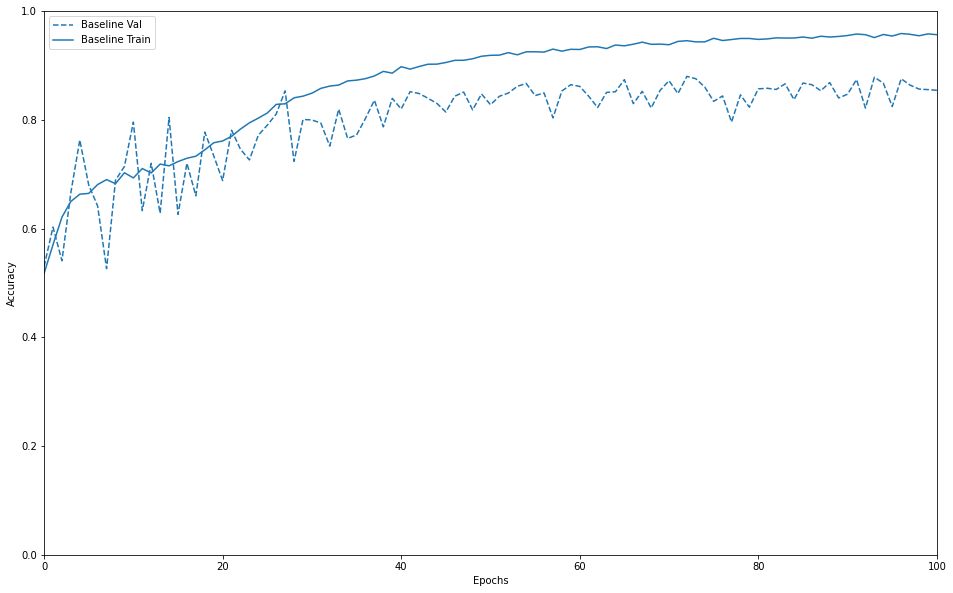

In [ ]:
import matplotlib.pyplot as plt


def plot_history(histories, key='accuracy'):
  plt.figure(figsize=(16,10))
  for name, history in histories:
    val = plt.plot(history.epoch, history.history['val_'+key],
                   '--', label=name.title()+' Val')
    plt.plot(history.epoch, history.history[key], color=val[0].get_color(),
             label=name.title()+' Train')

  plt.xlabel('Epochs')
  plt.ylabel(key.replace('_',' ').title())
  plt.legend()

  plt.xlim([0,max(history.epoch)])
  plt.ylim([0,1])

plot_history([('baseline', b_history)])



In [ ]:
print(max(b_history.history['val_recall']))

0.8802499771118164


#Analysis of the model
1. Before using class-Weights I have trained the baseline model and got accuarcy of  93.7 pecent, recall 0 percent for class 1 and all the records were predicted as Class '0(CARAVAN insurance not purchased') but our model aim is to predict the customers who purchased CARAVAN insurance(class 1). So performing the oversampling for getting the balanced classes.
2. After using custom class_weights as per the ratio of records , trained the model with 300 Epochs and obtained an accuracy of 88 percent and macro recall 38 percent for class 1. From the confusion matrix above we can see the prediction of target label in all the classes.
3. Though the records are less for class(1) which indicates purchased customers  got pretty good recall rates for the model after using weights.
4. The naive accuracy without training any model is approximately 94 percent as the majority class is with 0(not purchased)  ,macro recall 50 percent, so if we don't train any model the records are classified as per the majority class, all were classified as class 0(not purchased). So, though our model accuracy is low compared to baseline performance but it is predicting for both the classes. So, the baseline model trained above exceeded the baseline performance as recall was 50 percent macro recall ,no records classified under class 1 whereas the trained model above has 58 percent overall macro recall, classified 63 records correctly under class 1(customers who purchased CARAVAN insurance)